In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('epi_r.csv')

In [37]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB
None


In [38]:
# Display the first few rows
print(df.head())

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucc

In [39]:
# Check for missing values
print(df.isnull().sum())

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64


In [40]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 1801


In [41]:
# Basic statistics of numerical columns
print(df.describe())

             rating      calories        protein           fat        sodium  \
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105 

In [42]:
# Data cleaning
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [43]:
# Handle missing values
# For numerical columns, we'll fill missing values with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [44]:
# For categorical columns, we'll fill missing values with 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

In [45]:
# Verify missing values have been handled
print(df.isnull().sum())

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64


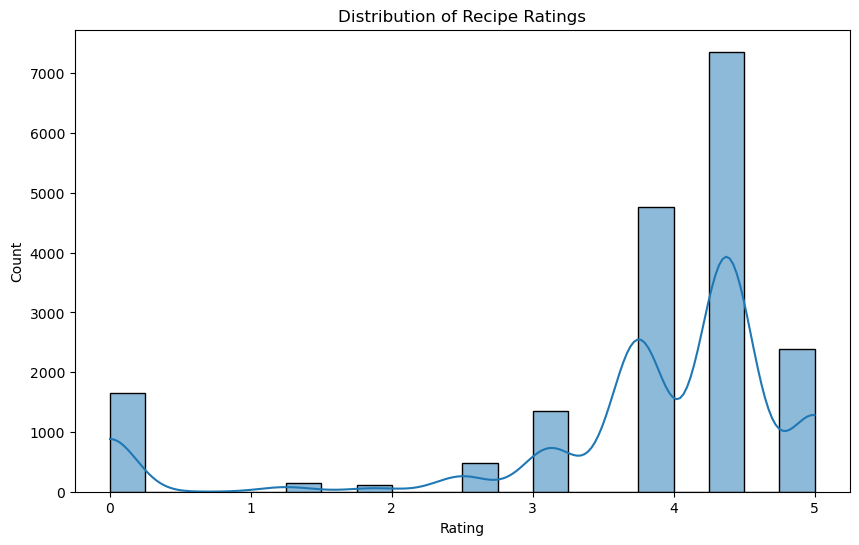

In [46]:
# Exploratory Data Analysis

# 1. Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

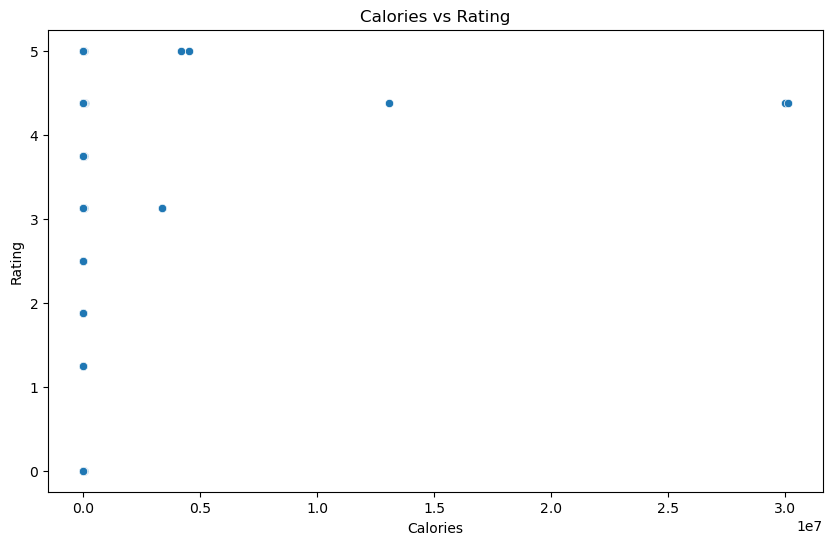

In [47]:
# 2. Correlation between calories and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df)
plt.title('Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

In [48]:
# Key Insights

# 1. Most common ingredients in highly rated recipes
high_rated = df[df['rating'] >= 4]
top_ingredients_high_rated = high_rated[ingredient_columns].sum().sort_values(ascending=False).head(10)
print("Top 10 ingredients in highly rated recipes:")
print(top_ingredients_high_rated)

Top 10 ingredients in highly rated recipes:
Series([], dtype: float64)


In [49]:
# 2. Correlation between preparation time and recipe ratings
prep_time_correlation = df['rating'].corr(df['#cakeweek'])
print(f"Correlation between preparation time and rating: {prep_time_correlation:.2f}")

Correlation between preparation time and rating: 0.00


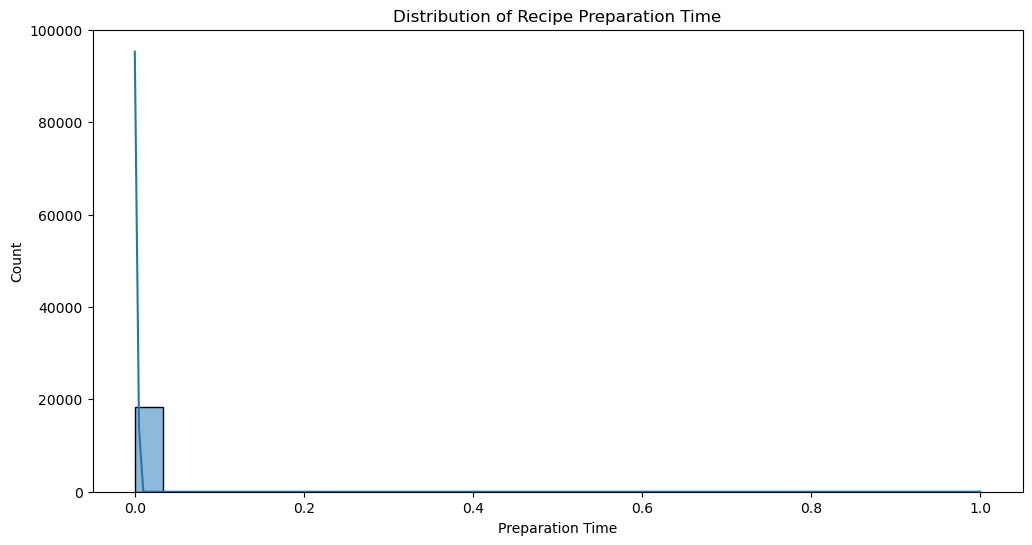

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your loaded and cleaned DataFrame

# 1. Preparation Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['#cakeweek'], bins=30, kde=True)
plt.title('Distribution of Recipe Preparation Time')
plt.xlabel('Preparation Time')
plt.ylabel('Count')
plt.show()

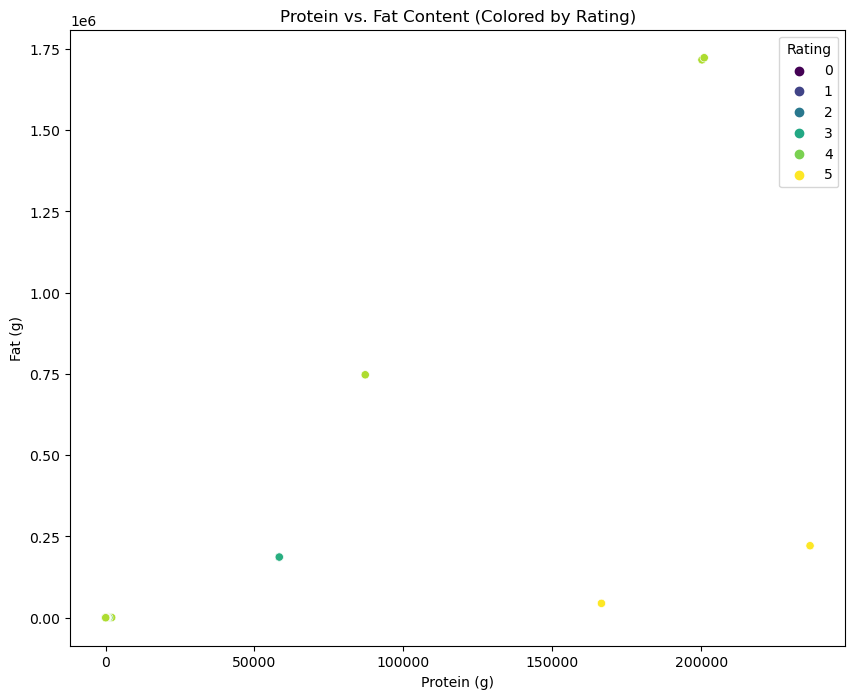

In [51]:
# 2. Protein vs. Fat Content
plt.figure(figsize=(10, 8))
sns.scatterplot(x='protein', y='fat', hue='rating', data=df, palette='viridis')
plt.title('Protein vs. Fat Content (Colored by Rating)')
plt.xlabel('Protein (g)')
plt.ylabel('Fat (g)')
plt.legend(title='Rating')
plt.show()

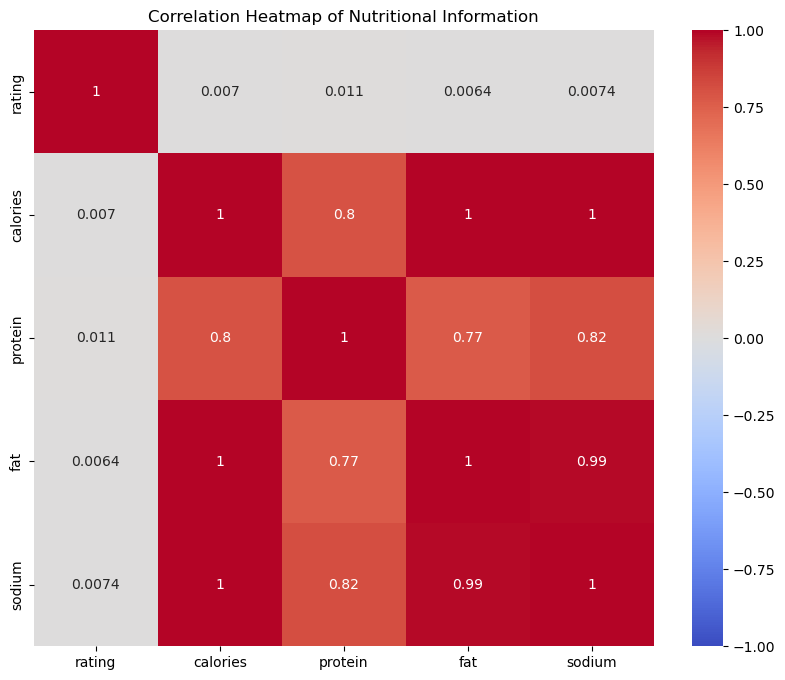

In [52]:
# 3. Correlation Heatmap
numeric_cols = ['rating', 'calories', 'protein', 'fat', 'sodium']
correlation = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Nutritional Information')
plt.show()

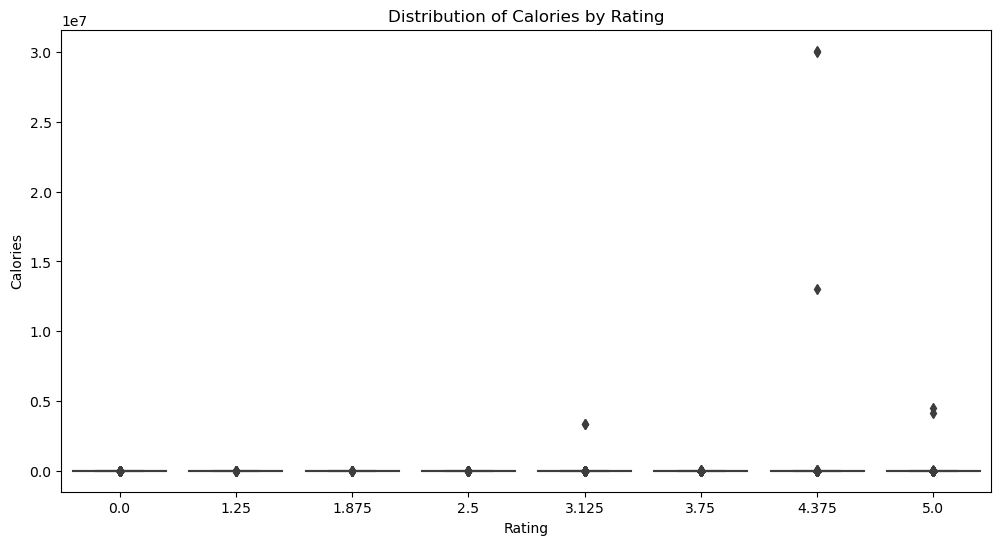

In [53]:
# 4. Boxplot of Calories by Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='calories', data=df)
plt.title('Distribution of Calories by Rating')
plt.xlabel('Rating')
plt.ylabel('Calories')
plt.show()

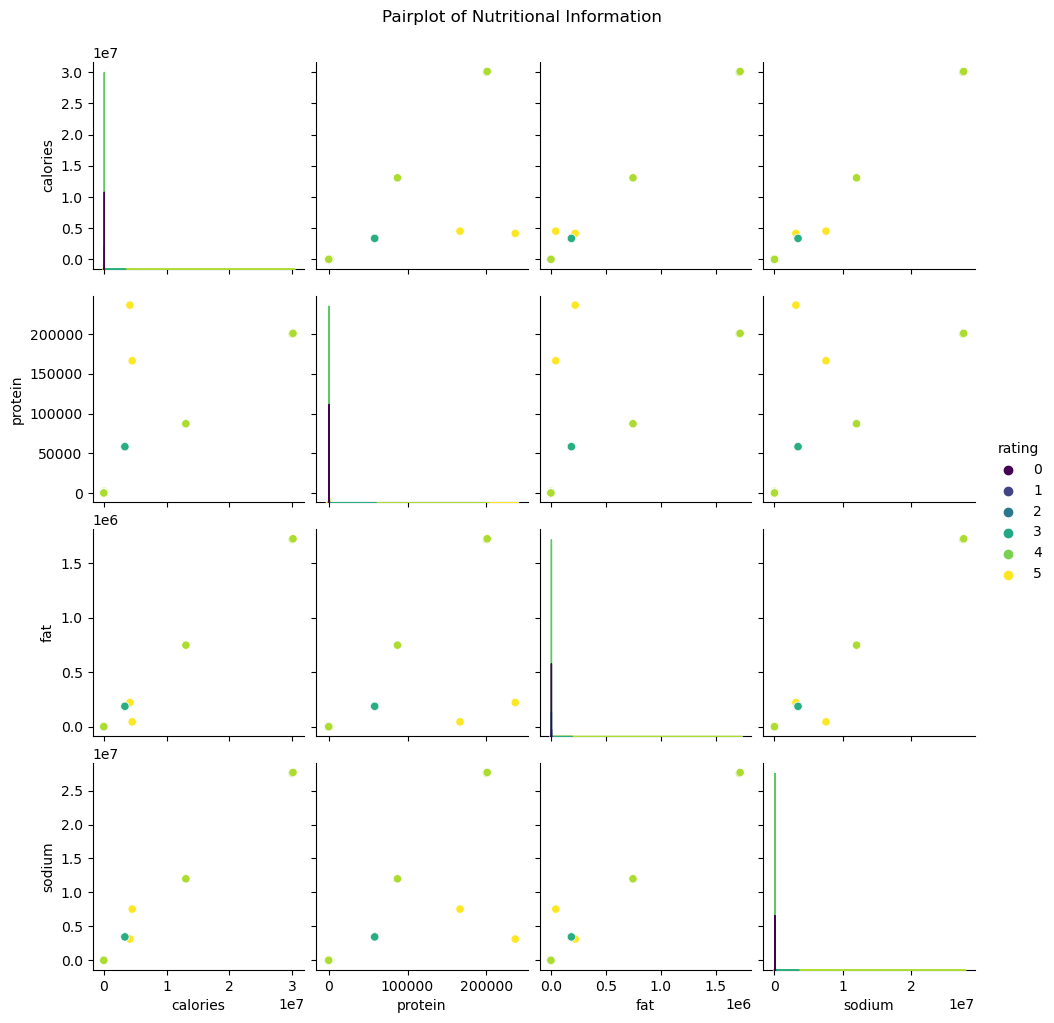

In [54]:
# 5. Pairplot for Nutritional Information
sns.pairplot(df[['rating', 'calories', 'protein', 'fat', 'sodium']], hue='rating', palette='viridis')
plt.suptitle('Pairplot of Nutritional Information', y=1.02)
plt.show()

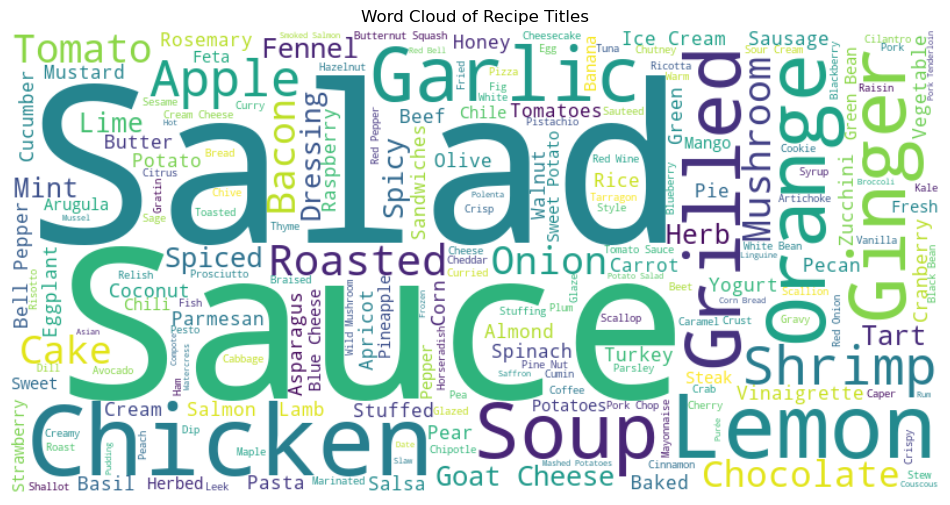

In [55]:
# 6. Word Cloud of Recipe Titles
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Recipe Titles')
plt.show()